In [1]:
import sys
sys.executable


'C:\\Users\\kiran\\Anaconda3\\envs\\tensorflow\\python.exe'

In [2]:
from IPython.display import display

In [3]:
import pandas as pd
import keras

Using TensorFlow backend.


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_df=pd.read_csv("data/train.csv")
train_df.head()
#SibSp-sibling and spouse, Parch- ,Embarked-starting of port , Parch- Parent and child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df=pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.info() #total count of rows, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
#creating new set of data, dropping unrequired data head(unnumerical & empty head)
#axis define which one to drop
train1 = train_df.drop(["PassengerId", "Name", "Sex", "Age", "Ticket", "Cabin", "Embarked", "Fare"], axis=1)
test1 = test_df.drop(["PassengerId", "Name", "Sex", "Age", "Ticket", "Cabin", "Embarked", "Fare"], axis=1)

In [19]:
#correlation plot
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)
    
#correlation:
# for x=1,2,3,4  and y=2,3,4, 5 is positive correlation as for increase in x there is increase in y by 1


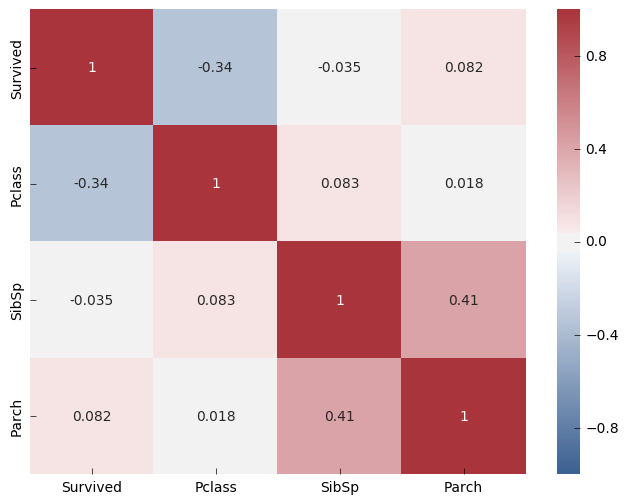

In [22]:
show_corr(train1) #we need to add  %matplotlib inline

In [ ]:
#for increased in survived feature in 
#As Pclass is increased Survival rate is decreasing,,i.e for Pclass 3 there is less survival


In [23]:
train1.head(2)

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0


In [24]:
test1.head(2)

,Pclass,SibSp,Parch
0,3,0,0
1,3,1,0


In [28]:
train1_x=train1.drop(["Survived"],axis=1)
train1_x.tail() 
#tail is opposite of head. which show last data
#survival is dropped as we need to find it.



,Pclass,SibSp,Parch
886,2,0,0
887,1,0,0
888,3,1,2
889,1,0,0
890,3,0,0


In [29]:
type(train1_x) # if one column-> it gives dataframes

pandas.core.frame.DataFrame

In [30]:
#1.1featrures 1.2 Output
#2.1Area, stories, rooms 2.2 price
#here label is survived

train1_y = train1["Survived"]
train1_y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [31]:
#Random Forest
#if given right parameters, RF is multiple dicision network

from sklearn.ensemble import RandomForestClassifier

In [32]:
clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train1_x, train1_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=12,
            verbose=0, warm_start=False)

In [33]:
clf_rf.score(train1_x, train1_y) #training accuracy

0.72166105499438837

In [36]:
predictions1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [37]:
predictions1 = clf_rf.predict(test1)

In [38]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [39]:
a=kgl_submit_csv(test_df,predictions1,)

Number of predictions: 418
Number of passengers 418


In [41]:
a = kgl_submit_csv(test_df, predictions1, savename= "prediction_saved.csv", save=True)

Number of predictions: 418
Number of passengers 418


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
